In [217]:
import datetime as dt
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import csv
import datetime

from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

# from api_key import api_key
from flask import Flask, jsonify, render_template


from flask_sqlalchemy import SQLAlchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import sqlalchemy



In [218]:
api_key = "93ba5366cb39b249dcbde95cc4d461e7b05b747d"
export_url = (f"https://api.census.gov/data/timeseries/intltrade/exports")
import_url = (f"https://api.census.gov/data/timeseries/intltrade/imports")
china_code = "5700"
usa_code = "1000"
month = []
year = []
#&ParameterName={parameter_name}
#url = (f"https://apps.bea.gov/api/data?&UserID={api_key}&method={get_data}&datasetname={dataset}&LineCode={line_code}&TableName={table_name}&GeoFIPS={geofip}&Year={year}")

#SAINC51
#response = requests.get(url).json()       
#list_response = requests.get(list_url).json()

In [169]:
total_trade = requests.get(f"{export_url}/hs?get=ALL_VAL_MO&key={api_key}&time=2019-01").json() 

In [516]:
total_trade[1][0]

'129545568405'

In [171]:
requests.get(f"https://api.census.gov/data/timeseries/intltrade/exports/hs?get=DF,ALL_VAL_MO,ALL_VAL_YR&YEAR=2013&MONTH=12").json()

[['DF', 'ALL_VAL_MO', 'ALL_VAL_YR', 'YEAR', 'MONTH'],
 ['-', '131915459503', '1578516879950', '2013', '12'],
 ['1', '114956497285', '1371134061205', '2013', '12'],
 ['2', '16958962218', '207382818745', '2013', '12']]

In [518]:
china_exports = requests.get(f"{export_url}/hs?get=ALL_VAL_MO,ALL_VAL_YR&key={api_key}&time=from+2015-01&CTY_CODE={china_code}").json()


In [44]:
# requests.get(f"{export_url}/hs?get=CTY_CODE,CTY_NAME,ALL_VAL_MO,ALL_VAL_YR,E_COMMODITY_LDESC&key={api_key}&time=from+2015-01&CTY_CODE={china_code}").json()


clear


In [45]:
# export_by_commodity = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&key={api_key}&time=from+2015-01&COMM_LVL=HS4&CTY_CODE={china_code}").json()


In [47]:
len(export_by_commodity)

54073

In [48]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 54072:
    count += 1
    movalue.append(export_by_commodity[count][2])
    yrvalue.append(export_by_commodity[count][3])
    desc.append(export_by_commodity[count][1])
    period.append(export_by_commodity[count][4])
    code.append(export_by_commodity[count][0])
china_data = pd.DataFrame({"YTD Value" : yrvalue,
                           "Monthly Value " : movalue,
                          "Period" : period,
                          "Commodity" : desc,
                          "Comm Code": code})

In [51]:

china_data.tail()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
54066,320405,37821,2018-08,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54067,327518,7113,2018-09,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54068,361042,33524,2018-10,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54069,399482,38440,2018-11,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54070,444867,45385,2018-12,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620


In [219]:
engine = create_engine('sqlite:///../data/china_trade.sqlite', echo=False)


In [3]:
china_data.to_sql('export', con=engine, if_exists='replace') #dont run this again

NameError: name 'china_data' is not defined

In [16]:
import_by_commodity = requests.get(f"{import_url}/hs?get=I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_MO,GEN_VAL_YR&key={api_key}&time=from+2015-01&COMM_LVL=HS4&CTY_CODE={china_code}").json()

In [19]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 55352:
    count += 1
    movalue.append(import_by_commodity[count][2])
    yrvalue.append(import_by_commodity[count][3])
    desc.append(import_by_commodity[count][1])
    period.append(import_by_commodity[count][4])
    code.append(import_by_commodity[count][0])
import_china_data = pd.DataFrame({"YTD Value" : yrvalue,
                           "Monthly Value " : movalue,
                          "Period" : period,
                          "Commodity" : desc,
                          "Comm Code": code})

In [29]:
import_china_data.to_sql('import', con=engine, if_exists='replace') 

In [241]:
export_by_product = requests.get(f"{import_url}/hs?get=I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_MO,GEN_VAL_YR&key={api_key}&time=from+2015-01&COMM_LVL=HS6&CTY_CODE={china_code}").json()

In [173]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 210375:
    count += 1
    movalue.append(export_by_product[count][2])
    yrvalue.append(export_by_product[count][3])
    desc.append(export_by_product[count][1])
    period.append(export_by_product[count][4])
    code.append(export_by_product[count][0])
export_products = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue " : movalue,
                          "Period" : period,
                          "Description" : desc,
                          "Comm Code": code})

210376

In [ ]:
export_china_data.to_sql('export', con=engine, if_exists='replace') 

In [182]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 210375:
    count += 1
    movalue.append(import_by_product[count][2])
    yrvalue.append(import_by_product[count][3])
    desc.append(import_by_product[count][1])
    period.append(import_by_product[count][4])
    code.append(import_by_product[count][0])
import_products = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue " : movalue,
                          "Period" : period,
                          "Description" : desc,
                          "Comm Code": code})

In [183]:
import_products.head()

,YTDValue,MoValue,Period,Description,HSC
0,4453077,4453077,2015-01,COLLECTORS ITEMS OF BOTANIC. HISTOR ETC I,970500
1,153128369,153128369,2015-01,IMPORTS OF ARTICLES EXPORTED & RETURN,980100
2,3353962,3353962,2015-01,IMPORTS OF ARTICLES EXPORTED & R,980200
3,27751,27751,2015-01,IMPORTS DUTY FREE UNDER BOND FOR PERMANENT EXH...,981200
4,24257983,24257983,2015-01,IMPORTS DUTY FREE UNDER SPEC CLASSIF PROV NESOI,981700


In [220]:
engine = create_engine('sqlite:///../data/china_trade.sqlite')
#engine = create_engine("sqlite:///db/china_trade.sqlite")




In [235]:
Base = automap_base()
Base.prepare(engine, reflect=True)
session = Session(engine)


In [234]:
Base.classes.keys()

['export', 'hs2export', 'hs2import', 'imports', 'yrhs2export', 'yrhs2import']

In [236]:
Imports = Base.classes.imports

In [237]:
IndImports = Base.classes.hs2import
IndExports = Base.classes.hs2export
YRImports = Base.classes.yrhs2import
YRExports = Base.classes.yrhs2export

In [238]:
Exports = Base.classes.export

In [240]:
exports = session.query(Imports).first()
exports.__dict__


{'Description': 'FISH, DRIED, SALTED ETC, SMOKED ETC; ED FISH MEAL',
 'HSC': 305,
 'MoValue': 5385854,
 'Period': '2015-02',
 'YTDValue': 12238358,
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29fba622198>,
 'index': 0}

In [14]:
results = session.query(Imports).statement


In [12]:
df = pd.read_sql_query(results, session.bind)

In [13]:
df.columns

Index(['index', 'YTDValue', 'MoValue', 'Period', 'Description', 'HSC'], dtype='object')

In [14]:
list(df.columns)

['index', 'YTDValue', 'MoValue', 'Period', 'Description', 'HSC']

In [13]:
sel = [
        Imports.Description,
        Imports.YTDValue,
        Imports.MoValue,
        Imports.Period,
        Imports.Description
    ]

AttributeError: type object 'imports' has no attribute 'MoValue'

In [3]:
# session.query(*sel).filter(Imports.HSC == "305").all()

In [27]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)


In [120]:
##### GOOD CODE FOR INDIVIDUAL SEARCHES IE TOOLTIP"
year = 2018
hsc = 97
sel = [
        Imports.Description,
        Imports.YTDValue,
        Imports.Period,
        Imports.HSC
        ]

results = session.query(*sel).filter(Imports.HSC == hsc).filter(Imports.Period.like(f"%{year}%")).all()
hsc_data = {}
for result in results:
    hsc_data["Description"] = result[0]
    hsc_data["Annual Value"] = result[1]
    hsc_data["Year"] = result[2]
    hsc_data["HSC"] = result[3]

In [137]:
hsc_data

{'Annual Value': 252327033,
 'Description': 'SPECIAL IMPORT PROVISIONS, NESOI',
 'HSC': 99,
 'Year': '2015-01'}

In [451]:
year_hs2 = requests.get(f"{import_url}/hs?get=I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_YR&YEAR=2015&YEAR=2016&YEAR=2017&YEAR=2018&YEAR=2019&COMM_LVL=HS2&CTY_CODE={china_code}").json()


In [458]:
len(year_hs2)

4803

In [453]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4802:
    count += 1
    yrvalue.append(year_hs2[count][2])
    desc.append(year_hs2[count][1])
    period.append(year_hs2[count][3])
    code.append(year_hs2[count][0])
yr_hs2_import = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})

In [454]:
yr_hs2_import.to_sql('yrhs2import', con=engine, if_exists='replace') 

In [455]:
year_hs2exp = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_YR&YEAR=2015&YEAR=2016&YEAR=2017&YEAR=2018&YEAR=2019&COMM_LVL=HS2&CTY_CODE={china_code}").json()


In [456]:
len(year_hs2exp)

4746

In [460]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4745:
    count += 1
    yrvalue.append(year_hs2exp[count][2])
    desc.append(year_hs2exp[count][1])
    period.append(year_hs2exp[count][3])
    code.append(year_hs2exp[count][0])
yr_hs2_export = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})

In [461]:
yr_hs2_export.to_sql('yrhs2export', con=engine, if_exists='replace') 

In [19]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4802:
    count += 1
    yrvalue.append(import_hs2[count][2])
    desc.append(import_hs2[count][1])
    period.append(import_hs2[count][3])
    code.append(import_hs2[count][0])
hs2_import = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})


In [21]:
# hs2_import.to_sql('hs2import', con=engine, if_exists='replace') 

In [33]:
# export_hs2 = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&time=from+2015-01&COMM_LVL=HS2&CTY_CODE={china_code}").json()



In [143]:
# count = 1
# movalue = []
# yrvalue = []
# period = []
# desc = []
# code = []
# while count < 4802:
#     count += 1
#     movalue.append(import_by_commodity[count][2])
#     yrvalue.append(import_by_commodity[count][3])
#     desc.append(import_by_commodity[count][1])
#     period.append(import_by_commodity[count][4])
#     code.append(import_by_commodity[count][0])
# hs2_export = pd.DataFrame({"YTDValue" : yrvalue,
#                            "MoValue " : movalue,
#                           "Period" : period,
#                           "Description" : desc,
#                           "HSC": code})


In [34]:
# hs2_export.to_sql('hs2export', con=engine, if_exists='replace') 


In [ ]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4802:
    count += 1
    yrvalue.append(import_hs2[count][2])
    desc.append(import_hs2[count][1])
    period.append(import_hs2[count][3])
    code.append(import_hs2[count][0])
hs2_import = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})

In [505]:
stmt = session.query(IndImports).statement
df = pd.read_sql_query(stmt, session.bind)

In [503]:
stmt = session.query(IndImports).statement
df = pd.read_sql_query(stmt, session.bind)

year = 2015
hsc = 1
sel = [
        IndImports.Description,
        IndImports.YTDValue,
        IndImports.Period,
        IndImports.HSC
        ]

results = session.query(*sel).filter(IndImports.HSC == 1).filter(IndImports.Period.like(f"%{year}%")).all()
hsc_ind_imports = {}
for result in results:
    hsc_ind_imports["Description"] = result[0]
    hsc_ind_imports["Annual Value"] = result[1]
    hsc_ind_imports["Year"] = result[2]
    hsc_ind_imports["HSC"] = result[3]

In [178]:
g = session.query(IndImports.HSC).filter(IndImports.HSC == "01").all()

In [504]:
hsc_ind_imports

{'Annual Value': 27704684,
 'Description': 'LIVE ANIMALS',
 'HSC': 1,
 'Year': '2015-12'}

In [297]:
yr = session.query(YRImports).first()
yr.__dict__

{'Description': 'LEAD AND ARTICLES THEREOF',
 'HSC': 78,
 'Period': '2017',
 'YTDValue': 2194573,
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ea339e82e8>,
 'index': 0}

In [407]:
stmt = session.query(YRImports).statement
df = pd.read_sql_query(stmt, session.bind)

In [527]:
dates = df.loc[df['Period'] == 2016]

In [249]:
test_df = df.groupby(["Period"])["YTDValue", "HSC", "Period"]

In [332]:
df["YTDValue", "HSC", "Period"]= [i[:4] for i in df['Period']]

In [409]:
df = pd.read_sql_query(stmt, session.bind)

In [408]:
df["Period"]

TypeError: 'Series' object is not callable

In [399]:
yr_hs2_import["YTDValue"] =pd.to_numeric(yr_hs2_import["YTDValue"])


In [400]:
year = "2015"
first_2015 = yr_hs2_import[yr_hs2_import["Period"].str.contains(f"{year}")]


In [502]:
check = first_2015.groupby(["HSC","Description","Period"])["YTDValue"].sum()


In [402]:
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(10,"total")
data_2015 = data_2015.reset_index()

data_2015= data_2015.nlargest(10,"total")

In [403]:
data_2015

,HSC,Description,Period,total
0,85,ELECTRIC MACHINERY ETC; SOUND,2015,818112819400
1,84,"NUCLEAR REACTORS, BOILERS, MACHINERY ETC.; PARTS",2015,666100643226
2,94,FURNITURE; BEDDING ETC; LAMPS NESOI ETC,2015,181010404192
3,95,"TOYS, GAMES & SPORT EQUIPMENT; PARTS & ACCESSO...",2015,137998619706
4,64,"FOOTWEAR, GAITERS ETC. AND PARTS THEREOF",2015,113801708948
5,61,"APPAREL ARTICLES AND ACCESSORIES, KNIT OR CROCHET",2015,97092844954
6,62,"APPAREL ARTICLES AND ACCESSORIES, NOT KNIT ETC.",2015,94814507202
7,39,PLASTICS AND ARTICLES THEREOF,2015,94005729937
8,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS...",2015,85574454525
9,90,"OPTIC, PHOTO ETC, MEDIC OR S",2015,71151180495


In [45]:
year= "2016"
stmt = session.query(YRExports).statement
df = pd.read_sql_query(stmt, session.bind)
df["YTDValue"] =pd.to_numeric(df["YTDValue"])
first_2015 = df[df["Period"].str.contains(f"{year}")]
data_2015 = first_2015.groupby(["HSC","Description","Period"])["YTDValue"].sum()
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(10,"total")
data_2015 = data_2015.reset_index()

data_2015= data_2015.nlargest(10,"total")

In [476]:
data_2015= data_2015.to_json()


In [496]:
data_2015

,HSC,Description,Period,total
0,88,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF",2016,86651134392
1,85,ELECTRIC MACHINERY ETC; SOUND,2016,78930329601
2,84,"NUCLEAR REACTORS, BOILERS, MACHINERY ETC.; PARTS",2016,74341211586
3,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS...",2016,68051586710
4,12,"OIL SEEDS ETC.; MISC GRAIN, SEED, FRUIT, PLANT...",2016,67929422483
5,90,"OPTIC, PHOTO ETC, MEDIC OR S",2016,52258343745
6,39,PLASTICS AND ARTICLES THEREOF,2016,30831182836
7,47,WOOD PULP ETC; RECOVD (WASTE & SCRAP) PPR & PPRBD,2016,21010065898
8,44,WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL,2016,16010520349
9,29,ORGANIC CHEMICALS,2016,15204269108


In [497]:
year= "2016"
stmt = session.query(YRImports).statement
df = pd.read_sql_query(stmt, session.bind)
df["YTDValue"] =pd.to_numeric(df["YTDValue"])
first_2015 = df[df["Period"].str.contains(f"{year}")]
data_2015 = first_2015.groupby(["HSC","Description","Period"])["YTDValue"].sum()
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(10,"total")
data_2015 = data_2015.reset_index()

imp_2015= data_2015.nlargest(10,"total")

In [501]:
imp_2015["total"].div(100000)

0    7.727439e+06
1    6.185776e+06
2    1.863899e+06
3    1.356311e+06
4    9.768266e+05
5    9.259231e+05
6    8.961216e+05
7    8.787688e+05
8    8.654447e+05
9    7.121349e+05
Name: total, dtype: float64

In [424]:
pie_imports = {}
for result in data_2015:
    pie_imports["Description"] = result[1]
    pie_imports["Annual Value"] = result[2]
    pie_imports["HSC"] = result[0]

In [429]:
data_2015.to_dict("records")

[{'Description': 'ELECTRIC MACHINERY ETC; SOUND',
  'HSC': '85',
  'Period': '2015',
  'total': 818112819400},
 {'Description': 'NUCLEAR REACTORS, BOILERS, MACHINERY ETC.; PARTS',
  'HSC': '84',
  'Period': '2015',
  'total': 666100643226},
 {'Description': 'FURNITURE; BEDDING ETC; LAMPS NESOI ETC',
  'HSC': '94',
  'Period': '2015',
  'total': 181010404192},
 {'Description': 'TOYS, GAMES & SPORT EQUIPMENT; PARTS & ACCESSORIES',
  'HSC': '95',
  'Period': '2015',
  'total': 137998619706},
 {'Description': 'FOOTWEAR, GAITERS ETC. AND PARTS THEREOF',
  'HSC': '64',
  'Period': '2015',
  'total': 113801708948},
 {'Description': 'APPAREL ARTICLES AND ACCESSORIES, KNIT OR CROCHET',
  'HSC': '61',
  'Period': '2015',
  'total': 97092844954},
 {'Description': 'APPAREL ARTICLES AND ACCESSORIES, NOT KNIT ETC.',
  'HSC': '62',
  'Period': '2015',
  'total': 94814507202},
 {'Description': 'PLASTICS AND ARTICLES THEREOF',
  'HSC': '39',
  'Period': '2015',
  'total': 94005729937},
 {'Description':

In [509]:
df['Period'] = int(df['Period'])

TypeError: cannot convert the series to <class 'int'>

In [619]:
df.iloc["2015-01"]

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2015-01] of <class 'str'>

In [138]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)

In [13]:
df.describe()

,index,YTDValue,MoValue,HSC
count,55351.000000,5.535100e+04,5.535100e+04,55351.000000
mean,27675.000000,2.256714e+08,3.671684e+07,5527.660115
std,15978.601712,1.562582e+09,2.296415e+08,2683.000184
min,0.000000,0.000000e+00,0.000000e+00,101.000000
25%,13837.500000,1.148676e+06,2.107825e+05,2941.000000
50%,27675.000000,1.168294e+07,2.207257e+06,5705.000000
75%,41512.500000,7.948288e+07,1.514102e+07,8211.000000
max,55350.000000,7.195490e+10,9.362369e+09,9999.000000


In [37]:
dates_2016 = df.loc[df['Period'].str.contains("2016-12")]
dates_2015 = df.loc[df['Period'].str.contains("2015-12")]
dates_2017 = df.loc[df['Period'].str.contains("2017-12")]
dates_2018 = df.loc[df['Period'].str.contains("2018-12")]

In [129]:
dates_2016 = df.loc[df["Period"].str.contains("2016")]

In [576]:
dates = df.loc[df['Period'].str.contains("2015-12")]

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55351 entries, 0 to 55350
Data columns (total 6 columns):
index          55351 non-null int64
YTDValue       55351 non-null int64
MoValue        55351 non-null int64
Period         55351 non-null object
Description    55351 non-null object
HSC            55351 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ MB


In [630]:
yearly_imports = pd.concat([dates_2015, dates_2016, dates_2017, dates_2018], ignore_index=True)
df = df.drop(["index"], axis=1)

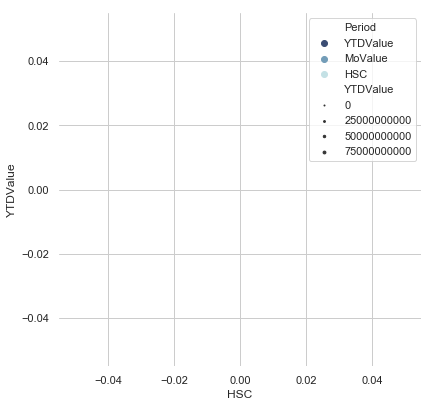

In [17]:
import seaborn as sns
from seaborn import scatterplot


import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import pandas as pd
imports_data = df
imports = ["YTDValue", "MoValue", "HSC"]


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="HSC", y="YTDValue",
                hue="Period", size="YTDValue",
                palette="ch:r=-.2,d=.3_r",
                hue_order=imports,
                sizes=(1, 8), linewidth=0,
                data=imports_data, ax=ax)

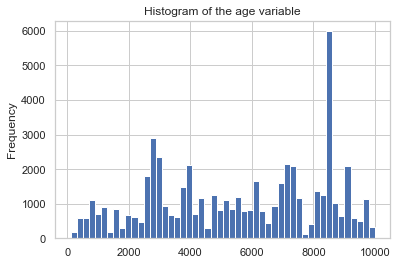

In [61]:
df['HSC'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
)

TypeError: reduction operation 'mean' not allowed for this dtype

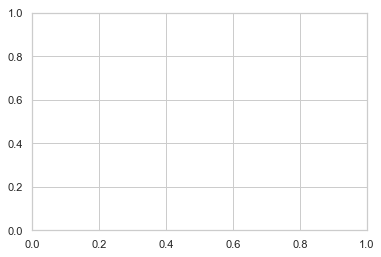

In [56]:
df["Period"] = pd.to_datetime(df["Period"])
sns.regplot(x=df["YTDValue"], y=df["Period"], line_kws={"color":"r","alpha":0.7,"lw":5})


In [195]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55351 entries, 0 to 55350
Data columns (total 6 columns):
index          55351 non-null int64
YTDValue       55351 non-null int64
MoValue        55351 non-null int64
Period         55351 non-null object
Description    55351 non-null object
HSC            55351 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ MB


In [204]:
import_products.head()
from scipy.stats import zscore
df["MO_zscore"] = zscore(df["MoValue"])
df["is_outlier"] = df["MO_zscore"].apply(
  lambda x: x <= -1.5 or x >= 1.5
)
superdf = df[df["is_outlier"]].sort_values(by=['HSC'], ascending = False)

In [ ]:
superdf

DO NOT LOSE THE ZSCORES

In [202]:
import_products.to_csv("products.csv")
prodcuts = pd.read_csv("products.csv")
prodcuts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210374 entries, 0 to 210373
Data columns (total 6 columns):
Unnamed: 0     210374 non-null int64
YTDValue       210374 non-null int64
MoValue        210374 non-null int64
Period         210374 non-null object
Description    210374 non-null object
HSC            210374 non-null int64
dtypes: int64(4), object(2)
memory usage: 9.6+ MB


In [215]:

prodcuts["MO_zscore"] = zscore(prodcuts["MoValue "])
prodcuts["is_outlier"] = prodcuts["MO_zscore"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
super_products = prodcuts[prodcuts["is_outlier"]].sort_values(by=['HSC'], ascending = True)

In [216]:
super_products

,Unnamed: 0,YTDValue,MoValue,Period,Description,HSC,MO_zscore,is_outlier
200345,200345,2440669804,247239151,2018-11,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,2.792489,True
194755,194755,2193430653,293295848,2018-10,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,3.333835,True
177326,177326,1163908401,244882436,2018-06,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,2.764789,True
209907,209907,294484532,294484532,2019-01,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,3.347807,True
190383,190383,1900134805,227374495,2018-09,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,2.559002,True
187623,187623,1672760310,242346412,2018-08,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,2.734981,True
203655,203655,2821611509,380941705,2018-12,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,4.364016,True
181084,181084,1430413898,266505497,2018-07,"FLOOR, WALL, ETC COVERS, VINYL CHLORIDE POLYMERS",391810,3.018944,True
209932,209932,255889711,255889711,2019-01,TABLEWARE AND KITCHENWARE OF PLASTICS,392410,2.894167,True
194796,194796,1907645004,222519325,2018-10,TABLEWARE AND KITCHENWARE OF PLASTICS,392410,2.501935,True


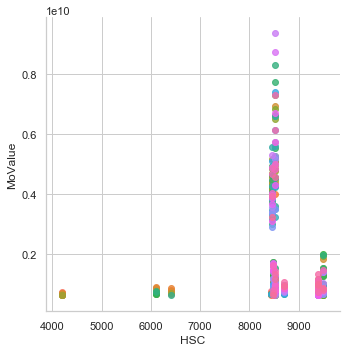

In [80]:
sns.lmplot( x="", y="MoValue", data=df, fit_reg=False, hue='Period', legend=False)


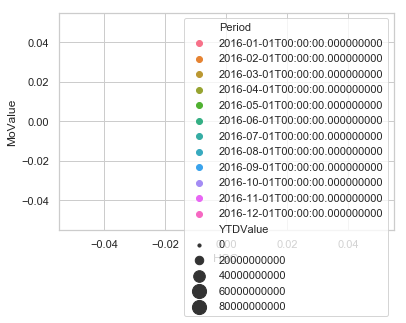

In [141]:
ax = sns.scatterplot(x="HSC", y="MoValue",
                     hue="Period", size="YTDValue",
                      sizes=(10, 200),
                     data=newdf)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


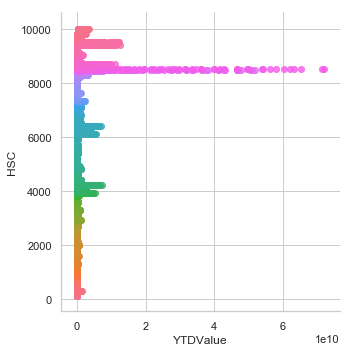

In [131]:
dates_2016["Period"] = pd.to_datetime(df["Period"])
sns.lmplot( x="YTDValue", y="HSC", data=df, fit_reg=False, hue='HSC', legend=False)
 
# Move the legend to an empty part of the plot


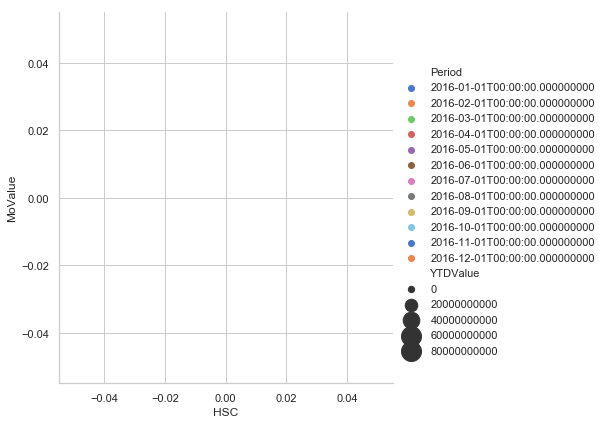

In [142]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="HSC", y="MoValue", hue="Period", size="YTDValue",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=newdf)

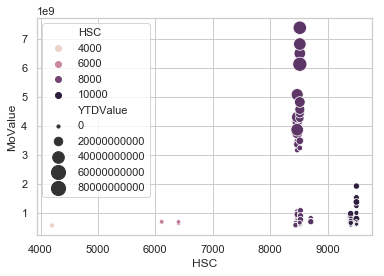

In [143]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="HSC", y="MoValue",
                     hue="HSC", size="YTDValue",
                      sizes=(10, 200),
                     data=newdf)

In [121]:
scatterdf = newdf[["HSC", "Period"]]
scatterdf["Period"] = pd.to_numeric(df["Period"])

scatterdf.info()

ValueError: Unable to parse string "2015-02" at position 0

In [144]:
scatterdf.plot.scatter(x="HSC", y="Period")

ValueError: scatter requires y column to be numeric

In [145]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 21948 to 53545
Data columns (total 8 columns):
index          125 non-null int64
YTDValue       125 non-null int64
MoValue        125 non-null int64
Period         125 non-null datetime64[ns]
Description    125 non-null object
HSC            125 non-null int64
MO_zscore      125 non-null float64
is_outlier     125 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 7.9+ KB


In [38]:

# Load the example car crash dataset
# Plot the crashes where alcohol was involved


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

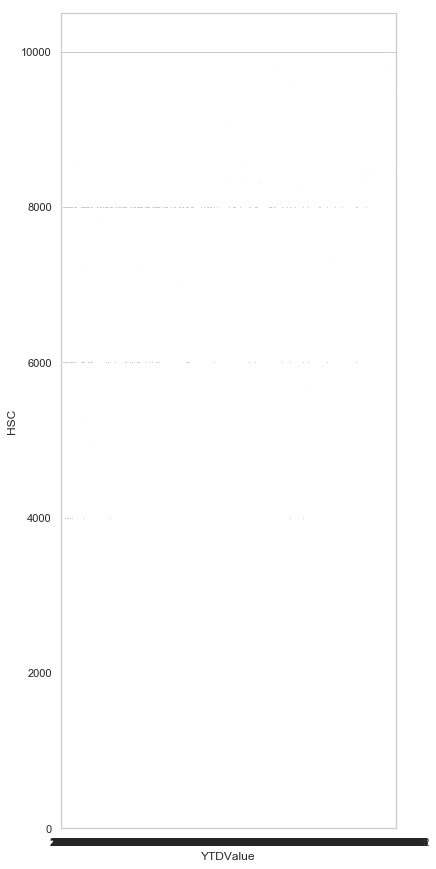

In [33]:
X = df['YTDValue']
X.shape

(55351,)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])